In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from google.colab import files
uploaded = files.upload()

Saving car data.csv to car data.csv


In [4]:
df=pd.read_csv("car data.csv")

In [5]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [12]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


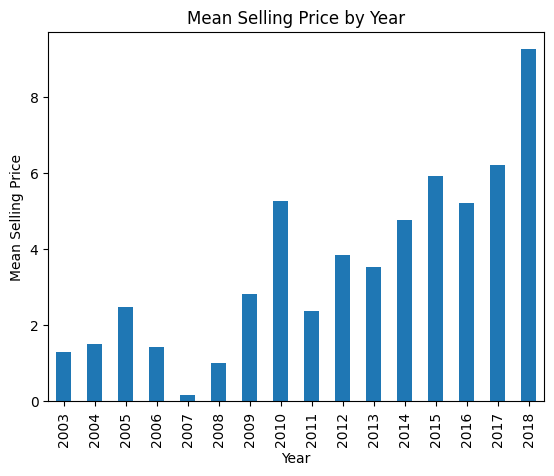

In [11]:
df.groupby('Year')['Selling_Price'].mean().plot(kind='bar')
plt.title('Mean Selling Price by Year')
plt.xlabel('Year')
plt.ylabel('Mean Selling Price')
plt.show()

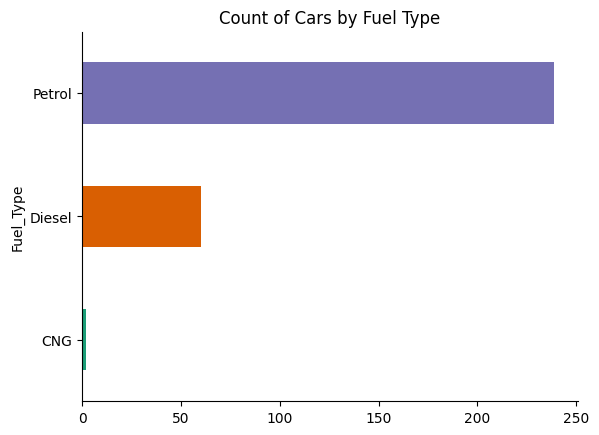

In [9]:
df.groupby('Fuel_Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Count of Cars by Fuel Type')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

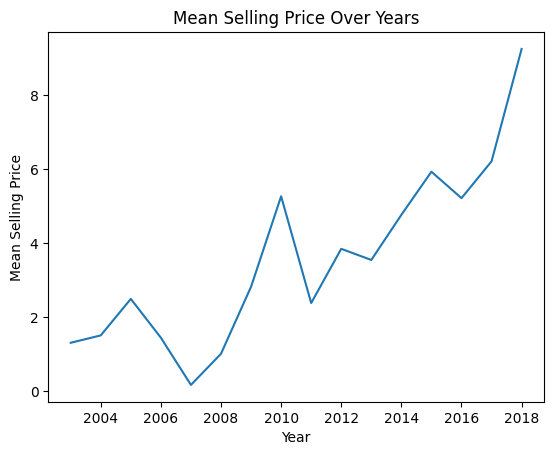

In [7]:
df.groupby('Year')['Selling_Price'].mean().plot()
plt.title('Mean Selling Price Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Selling Price')
plt.show()

In [13]:
df.dropna(inplace=True)

In [14]:
df = pd.get_dummies(df, drop_first=True)

In [15]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [19]:
train_p = model.predict(X_train_scaled)
test_p = model.predict(X_test_scaled)

In [20]:
print('Train Mean Squared Error :', mean_squared_error(y_train, train_p))
print('Test Mean Squared Error:', mean_squared_error(y_test, test_p))
print('Train R2 Score:', r2_score(y_train, train_p))
print('Test R2 Score:', r2_score(y_test, test_p))

Train Mean Squared Error : 1.3361389075440935
Test Mean Squared Error: 1.1551287277465448e+25
Train R2 Score: 0.9494596196522467
Test R2 Score: -5.014540554545434e+23
